In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy import nan as NA
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
import os

#Algorithms
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

In [2]:

data = pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
data.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [4]:
data.columns.tolist()

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported',
 '_c39']

In [5]:
data = pd.read_csv('Automobile_insurance_fraud.csv', 
                   usecols= ['months_as_customer', 
                             'age', 
                             'policy_bind_date',
                             'policy_state',
                             'policy_csl',
                             'policy_deductable',
                             'policy_annual_premium',
                             'umbrella_limit',
                             'insured_zip',
                             'insured_sex',
                             'insured_education_level',
                             'insured_occupation',
                             'insured_hobbies',
                             'insured_relationship',
                             'capital-gains',
                             'capital-loss',
                             'incident_date',
                             'incident_type',
                             'collision_type',
                             'incident_severity',
                             'authorities_contacted',
                             'incident_state',
                             'incident_city',
                             'incident_hour_of_the_day',
                             'number_of_vehicles_involved',
                             'property_damage',
                             'bodily_injuries',
                             'witnesses',
                             'police_report_available',
                             'total_claim_amount',
                             'injury_claim',
                             'property_claim',
                             'vehicle_claim',
                             'auto_year',
                             'fraud_reported'], 
                   na_values=['?'], na_filter = True, parse_dates = ['policy_bind_date','incident_date'], dayfirst = True)

In [6]:
data.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,1,2,YES,71610,6510,13020,52080,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NaN,0,0,NaN,5070,780,780,3510,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,2,3,NO,34650,7700,3850,23100,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NaN,1,2,NO,63400,6340,6340,50720,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,0,1,NO,6500,1300,650,4550,2009,N


In [7]:
data.isna().sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

In [8]:

data.shape

(1000, 35)

In [9]:
data['collision_type'].fillna(data['collision_type'].value_counts().index[0], inplace = True)

In [10]:
data['property_damage'].fillna(data['property_damage'].value_counts().index[0], inplace = True)

In [11]:
data['police_report_available'].fillna(data['police_report_available'].value_counts().index[0], inplace = True)

In [12]:
data.head(10)

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,1,2,YES,71610,6510,13020,52080,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NO,0,0,NO,5070,780,780,3510,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,2,3,NO,34650,7700,3850,23100,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,1,2,NO,63400,6340,6340,50720,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,0,1,NO,6500,1300,650,4550,2009,N
5,256,39,2006-10-12,OH,250/500,1000,1351.10,0,478456,FEMALE,...,NO,0,2,NO,64100,6410,6410,51280,2003,Y
6,137,34,2000-06-04,IN,250/500,1000,1333.35,0,441716,MALE,...,NO,0,0,NO,78650,21450,7150,50050,2012,N
7,165,37,1990-02-03,IL,100/300,1000,1137.03,0,603195,MALE,...,NO,2,2,YES,51590,9380,9380,32830,2015,N
8,27,33,1997-02-05,IL,100/300,500,1442.99,0,601734,FEMALE,...,NO,1,1,YES,27700,2770,2770,22160,2012,N
9,212,42,2011-07-25,IL,100/300,500,1315.68,0,600983,MALE,...,NO,2,1,NO,42300,4700,4700,32900,1996,N


In [13]:
data.isna().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [14]:

data.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                    

EDA - Plotting

In [15]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [16]:
data.age.max()

64

In [17]:
data['age_bins'] = pd.cut(data.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

In [18]:
age_vs_fraud = pd.crosstab(data['age_bins'], data['fraud_reported'])

In [19]:
age_vs_fraud

fraud_reported,N,Y
age_bins,,
11-20,1,1
21-30,150,45
31-40,302,94
41-50,221,72
51-60,66,30
61-70,13,5


<AxesSubplot:xlabel='age_bins'>

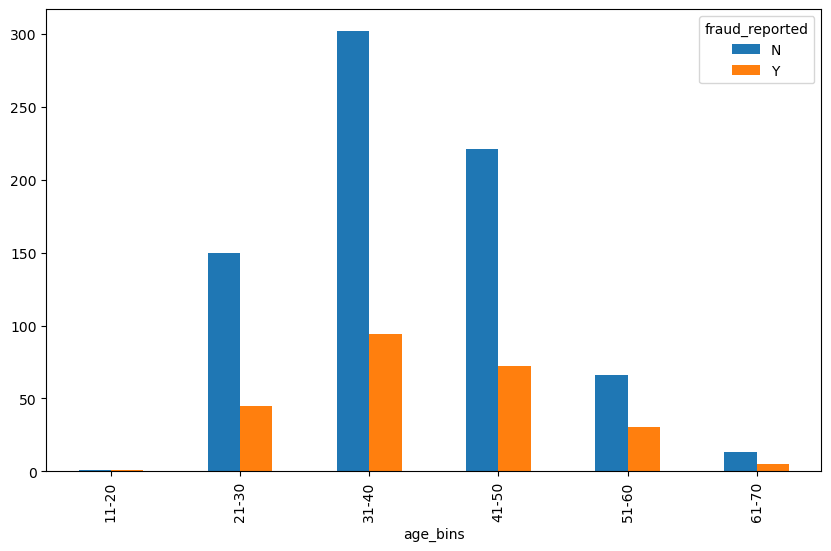

In [20]:
age_vs_fraud.plot(kind = 'bar', figsize = (10,6))

In [21]:
incisev_vs_fraud = pd.crosstab(data['incident_severity'], data['fraud_reported'])

In [22]:
incisev_vs_fraud

fraud_reported,N,Y
incident_severity,,
Major Damage,109,167
Minor Damage,316,38
Total Loss,244,36
Trivial Damage,84,6


<AxesSubplot:xlabel='incident_severity'>

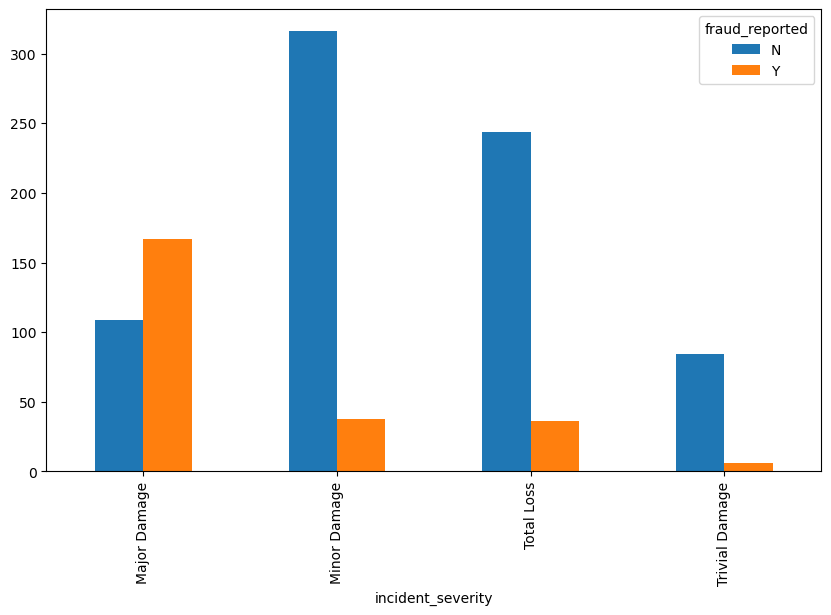

In [23]:
incisev_vs_fraud.plot(kind = 'bar', figsize = (10,6))

In [24]:
print(data.total_claim_amount.min())
print(data.total_claim_amount.max())

100
114920


In [25]:
data['total_claim_bins'] = pd.cut(data.total_claim_amount, bins = [0, 11500, 33000, 44800, 56300, 67800, 79300, 90800, 102300, 113800, 125300], include_lowest = True, labels = ['0-11500','11501-33000','33001-44800','444801-56300', '56301-67800', '67801-79300', '79301-90800','90801-102300','102301-113800','113801-125300'])

In [26]:
total_claim_vs_fraud = pd.crosstab(data.total_claim_bins, data.fraud_reported)

In [27]:
total_claim_vs_fraud

fraud_reported,N,Y
total_claim_bins,,
0-11500,162,16
11501-33000,19,3
33001-44800,63,19
444801-56300,127,58
56301-67800,174,58
67801-79300,118,57
79301-90800,64,24
90801-102300,20,9
102301-113800,5,3


<AxesSubplot:xlabel='total_claim_bins'>

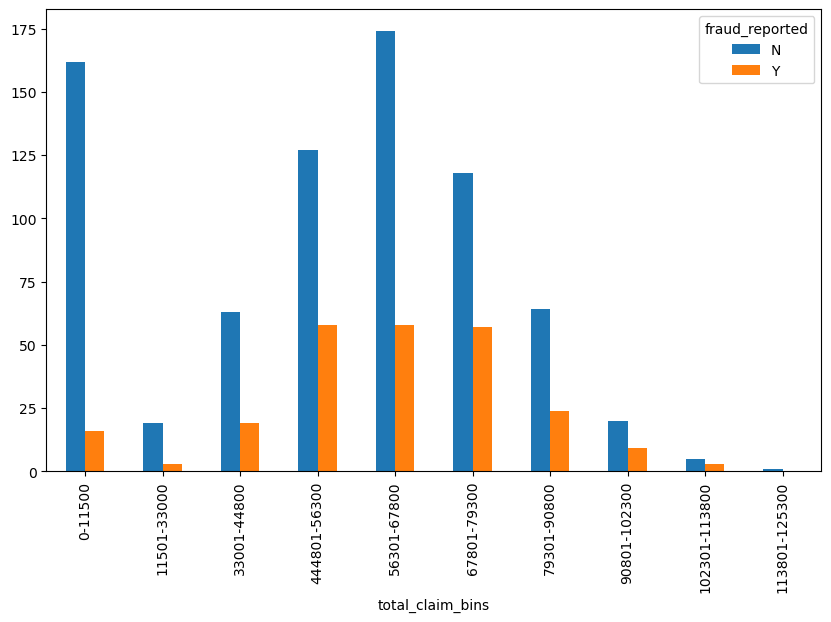

In [28]:
total_claim_vs_fraud.plot(kind = 'bar', figsize = (10,6))

In [29]:
gender_wise_fraud = pd.crosstab(data.insured_sex, data.fraud_reported)

In [30]:
gender_wise_fraud

fraud_reported,N,Y
insured_sex,,
FEMALE,411,126
MALE,342,121


<AxesSubplot:xlabel='insured_sex'>

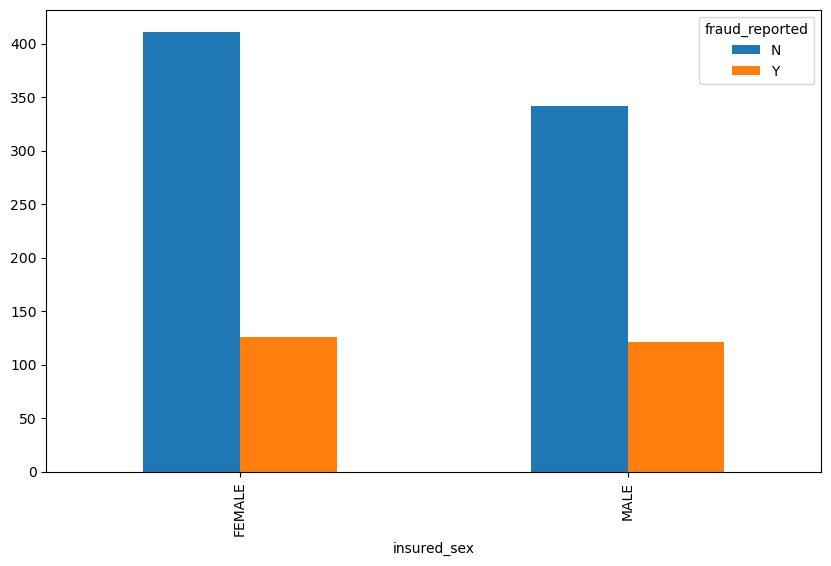

In [31]:
gender_wise_fraud.plot(kind = 'bar', figsize = (10,6))

In [32]:
print(data.policy_annual_premium.min())
print(data.policy_annual_premium.max())

433.33
2047.59


In [33]:
data['policy_premium_bins'] = pd.cut(data.policy_annual_premium, bins = [0, 500, 1000, 1500, 2000], include_lowest = True, labels = ['0-500','501-1000','1001-1500','1501-2000'])

In [34]:
policy_premium_vs_fraud = pd.crosstab(data.policy_premium_bins, data.fraud_reported)

In [35]:
policy_premium_vs_fraud

fraud_reported,N,Y
policy_premium_bins,,
0-500,1,1
501-1000,107,44
1001-1500,529,164
1501-2000,115,38


<AxesSubplot:xlabel='policy_premium_bins'>

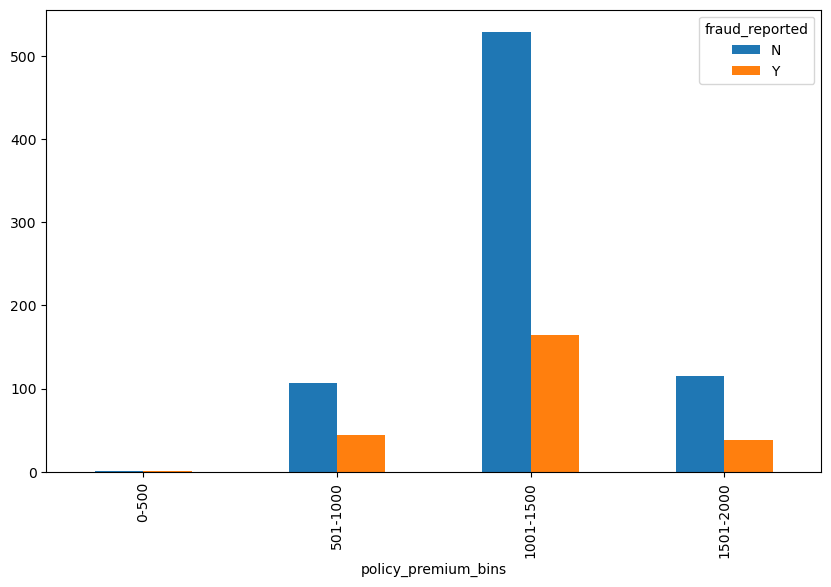

In [36]:
policy_premium_vs_fraud.plot(kind = 'bar', figsize = (10,6))

Feature Selection

In [37]:
data[['policy_state', 'insured_education_level', 'insured_occupation','incident_type', 'collision_type', 'incident_severity', 'authorities_contacted']].describe()

,policy_state,insured_education_level,insured_occupation,incident_type,collision_type,incident_severity,authorities_contacted
count,1000,1000,1000,1000,1000,1000,1000
unique,3,7,14,4,3,4,5
top,OH,JD,machine-op-inspct,Multi-vehicle Collision,Rear Collision,Minor Damage,Police
freq,352,161,93,419,470,354,292


In [38]:
data.drop(columns = ['policy_bind_date','policy_csl','insured_zip','insured_education_level','insured_occupation', 'insured_occupation','insured_hobbies','insured_relationship', 'incident_date', 'incident_state', 'incident_city', 'incident_type', 'authorities_contacted', 'property_damage', 'injury_claim', 'property_claim', 'vehicle_claim','age_bins', 'total_claim_bins', 'policy_premium_bins'], axis = 1, inplace = True)

In [39]:
data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,collision_type,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_year,fraud_reported
0,328,48,OH,1000,1406.91,0,MALE,53300,0,Side Collision,Major Damage,5,1,1,2,YES,71610,2004,Y
1,228,42,IN,2000,1197.22,5000000,MALE,0,0,Rear Collision,Minor Damage,8,1,0,0,NO,5070,2007,Y
2,134,29,OH,2000,1413.14,5000000,FEMALE,35100,0,Rear Collision,Minor Damage,7,3,2,3,NO,34650,2007,N
3,256,41,IL,2000,1415.74,6000000,FEMALE,48900,-62400,Front Collision,Major Damage,5,1,1,2,NO,63400,2014,Y
4,228,44,IL,1000,1583.91,6000000,MALE,66000,-46000,Rear Collision,Minor Damage,20,1,0,1,NO,6500,2009,N


In [40]:
data.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
capital-gains                    int64
capital-loss                     int64
collision_type                  object
incident_severity               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
auto_year                        int64
fraud_reported                  object
dtype: object

Let's convert all categorical variable to numerical using ONE HOT ENCODING

In [41]:
data_onehot = data[['policy_state','insured_sex', 'collision_type', 'incident_severity', 'police_report_available']]

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
enc = OneHotEncoder(sparse = False)

In [44]:
enc.fit(data_onehot)

OneHotEncoder(sparse=False)

In [45]:
data_onehot_transformed = enc.transform(data_onehot)

In [46]:
data_onehot_transformed

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [47]:
data_onehot_transformed.shape

(1000, 14)

In [48]:
columns = ['OH', 'IN', 'IL', 
                                'Insured_Male', 'Insured_Female',
                                'Side_Collison','Rear _Collison','Front Collison',
                                'Major Damage','Minor Damage','Total Loss','Trivial Damage'
                                'Police Report available', 'Police report not available']

In [49]:
# Converting returned array into a DataFrame

data2 = pd.DataFrame(data_onehot_transformed, columns = ['OH', 'IN', 'IL', 'Insured_Male', 'Insured_Female', 'Side_Collison','Rear _Collison','Front Collison', 'Major Damage','Minor Damage','Total Loss','Trivial Damage', 'Police Report available', 'Police report not available'])

In [50]:
data2.head()

,OH,IN,IL,Insured_Male,Insured_Female,Side_Collison,Rear _Collison,Front Collison,Major Damage,Minor Damage,Total Loss,Trivial Damage,Police Report available,Police report not available
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [51]:
data = pd.concat([data, data2], axis = 1)

In [52]:
data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,collision_type,...,Insured_Female,Side_Collison,Rear _Collison,Front Collison,Major Damage,Minor Damage,Total Loss,Trivial Damage,Police Report available,Police report not available
0,328,48,OH,1000,1406.91,0,MALE,53300,0,Side Collision,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,228,42,IN,2000,1197.22,5000000,MALE,0,0,Rear Collision,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,134,29,OH,2000,1413.14,5000000,FEMALE,35100,0,Rear Collision,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,256,41,IL,2000,1415.74,6000000,FEMALE,48900,-62400,Front Collision,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,228,44,IL,1000,1583.91,6000000,MALE,66000,-46000,Rear Collision,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [53]:
data.drop(['policy_state','insured_sex','collision_type', 'incident_severity','police_report_available'], axis = 1, inplace = True)

In [54]:
data.isna().sum() # to check if we are left with any NaN

months_as_customer             0
age                            0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
total_claim_amount             0
auto_year                      0
fraud_reported                 0
OH                             0
IN                             0
IL                             0
Insured_Male                   0
Insured_Female                 0
Side_Collison                  0
Rear _Collison                 0
Front Collison                 0
Major Damage                   0
Minor Damage                   0
Total Loss                     0
Trivial Damage                 0
Police Report available        0
Police report not available    0
dtype: int64

In [55]:
data.dtypes

months_as_customer               int64
age                              int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
auto_year                        int64
fraud_reported                  object
OH                             float64
IN                             float64
IL                             float64
Insured_Male                   float64
Insured_Female                 float64
Side_Collison                  float64
Rear _Collison                 float64
Front Collison                 float64
Major Damage                   float64
Minor Damage                   float64
Total Loss                     float64
Trivial Damage           

In [56]:
data['fraud_reported'] = data['fraud_reported'].replace({'Y': 1, 'N': 0})

In [57]:
data['fraud_reported'].head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

Modeling

In [58]:
X = data.drop('fraud_reported', axis= 1)
X.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,Insured_Female,Side_Collison,Rear _Collison,Front Collison,Major Damage,Minor Damage,Total Loss,Trivial Damage,Police Report available,Police report not available
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [59]:
y = data['fraud_reported']
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False, random_state=4 )

In [61]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (700, 27) (700,)
Test set: (300, 27) (300,)


Support Vector Machines(SVM)

In [64]:
from sklearn import svm
from sklearn.metrics import jaccard_score, f1_score, log_loss

data_svm = svm.SVC(kernel = 'rbf', probability = True)

In [65]:
data_svm.fit(X_train, y_train)

SVC(probability=True)

In [66]:
ypred_svm = data_svm.predict(X_test)
ypred_svm[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [67]:
acc_jacc_svm = jaccard_score(ypred_svm, y_test).round(2)
acc_jacc_svm

0.0

In [68]:
acc_f1_svm = f1_score(y_test, ypred_svm, average = 'weighted').round(2)
acc_f1_svm

0.66

In [69]:
# For log loss
ypred_svm_logloss = data_svm.predict_proba(X_test)[:,1]
print(ypred_svm_logloss[0:10])

[0.23931245 0.26803461 0.26787069 0.26834028 0.26778729 0.26816424
 0.26863553 0.26868965 0.26861358 0.26794075]


In [70]:
acc_logloss_svm = log_loss(y_test, ypred_svm_logloss, eps=1e-15, normalize = True).round(2)
acc_logloss_svm

0.55

Decision Trees

In [71]:
from sklearn.tree import DecisionTreeClassifier

loanTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
loanTree

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [72]:
loanTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [73]:
ypred_tree = loanTree.predict(X_test)
ypred_tree[0:10]

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [74]:
acc_jacc_dt = jaccard_score(ypred_tree, y_test).round(2)
acc_jacc_dt

0.44

In [75]:
acc_f1_dt = f1_score(ypred_tree, y_test, average ='weighted').round(2)
acc_f1_dt

0.81

Finding probabilities for log_loss

In [76]:
ypred_tree_logloss = loanTree.predict_proba(X_test)[:,1]
ypred_tree_logloss[0:10]

array([1.        , 0.65517241, 0.19512195, 0.        , 0.5875    ,
       0.3       , 0.1372549 , 0.19512195, 0.        , 0.1372549 ])

In [77]:
y_test[:15]

700    1
701    1
702    0
703    1
704    1
705    1
706    0
707    1
708    1
709    1
710    1
711    0
712    1
713    1
714    0
Name: fraud_reported, dtype: int64

In [78]:
acc_logloss_dt = log_loss(y_test, ypred_tree_logloss, eps=1e-15, normalize = True).round(2)
acc_logloss_dt

2.73

Logistic Regression

In [79]:
LR = LogisticRegression(C = 0.01, solver = 'liblinear')

In [80]:
LR.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [81]:
ypred_logreg = LR.predict(X_test)
ypred_logreg[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [82]:
acc_jacc_LR = jaccard_score(ypred_logreg, y_test).round(2)
acc_jacc_LR

0.0

In [83]:
acc_f1_LR = f1_score(ypred_logreg, y_test, average ='weighted').round(2)
acc_f1_LR

0.86

In [84]:
# Predicting probailities for Log loss

ypred_logreg_logloss = LR.predict_proba(X_test)[:,1]
ypred_logreg_logloss[0:10]

array([0.37539226, 0.19691347, 0.1295353 , 0.26196544, 0.20596847,
       0.23904116, 0.32140373, 0.33933057, 0.31214382, 0.24582144])

In [85]:
acc_logloss_LR = log_loss(y_test, ypred_logreg, eps=1e-15, normalize = True).round(2)
acc_logloss_LR

8.29

K Nearest Neighbor(KNN)

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
ks = 15

mean_acc = np.zeros((ks - 1))
std_acc = np.zeros((ks-1))

In [89]:
for n in range(3, ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X, y)
    y_predicted = neigh.predict(X_test)
    mean_acc[n-1] = jaccard_score(y_test, y_predicted)
    std_acc[n-1]=np.std(y_predicted==y_test)/np.sqrt(y_predicted.shape[0])

print(mean_acc)

[0.         0.         0.37634409 0.2        0.26506024 0.1369863
 0.18181818 0.13513514 0.13157895 0.08108108 0.09210526 0.04
 0.06578947 0.04      ]


In [90]:
knn_jaccard = mean_acc.max().round(2)
knn_jaccard

0.38

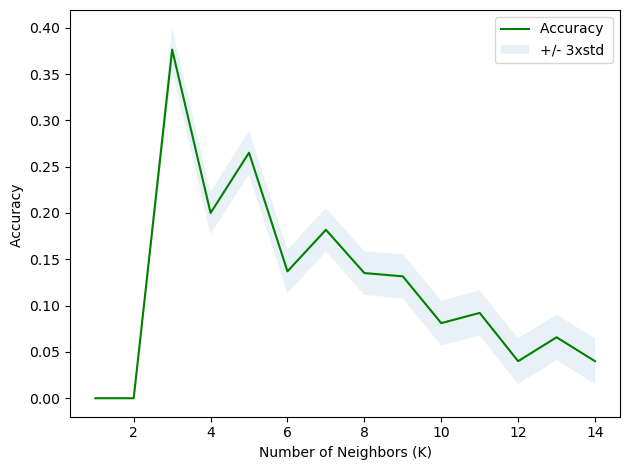

In [91]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [92]:
knn_f1_score = f1_score(y_test, y_predicted, average = 'weighted').round(2)
knn_f1_score

0.67

In [93]:
#Log Loss

for n in range(3, ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X, y)
    y_predicted_knn = neigh.predict_proba(X_test)[:,1]

print(y_predicted_knn[0:10])

[0.35714286 0.14285714 0.         0.35714286 0.14285714 0.28571429
 0.35714286 0.35714286 0.14285714 0.28571429]


In [94]:
knn_logloss = log_loss(y_test, y_predicted_knn, eps=1e-15,normalize = True).round(2)
knn_logloss

0.49

Summary

In [95]:
finalreport = {'KNN':[knn_jaccard, knn_f1_score, knn_logloss], 'Decision Tree':[acc_jacc_dt, acc_f1_dt, acc_logloss_dt], 'SVM': [acc_jacc_svm, acc_f1_svm, acc_logloss_svm], 'Logistic Regression': [acc_jacc_LR,acc_f1_LR, acc_logloss_LR]}

In [96]:
finalreport

{'KNN': [0.38, 0.67, 0.49],
 'Decision Tree': [0.44, 0.81, 2.73],
 'SVM': [0.0, 0.66, 0.55],
 'Logistic Regression': [0.0, 0.86, 8.29]}

In [97]:
Report = pd.DataFrame(finalreport, index = ['Jacard\'s Index','F1 score','Log loss'])

In [98]:
Report

,KNN,Decision Tree,SVM,Logistic Regression
Jacard's Index,0.38,0.44,0.00,0.00
F1 score,0.67,0.81,0.66,0.86
Log loss,0.49,2.73,0.55,8.29


Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
random_forest = RandomForestClassifier(n_estimators = 100, oob_score = True)
random_forest.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [101]:
yhat_rf = random_forest.predict(X_test)

In [102]:
acc_rf= round(random_forest.score(X_train, y_train)* 100, 2)
acc_rf

100.0

In [103]:
acc_rf_test= round(random_forest.score(X_test, y_test)* 100, 2)
acc_rf_test

81.67

In [104]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, cv = 3)

In [106]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 70],
                         'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35],
                         'n_estimators': [100, 400, 700, 1000, 1500]})

In [107]:
clf.best_estimator_

RandomForestClassifier(min_samples_split=25, n_jobs=-1, oob_score=True,
                       random_state=1)

In [108]:
random_forest_cv = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 1, min_samples_split = 25, n_estimators = 100, max_features = 'auto', oob_score = True, random_state = 1, n_jobs = -1)
random_forest_cv.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=25, n_jobs=-1, oob_score=True,
                       random_state=1)

In [109]:
acc_rf= round(random_forest_cv.score(X_train, y_train)* 100, 2)
acc_rf

89.14

In [110]:
yhat_rf = random_forest_cv.predict(X_test)

In [111]:
acc_rf_test= round(random_forest_cv.score(X_test, y_test)* 100, 2)
acc_rf_test

83.33

In [112]:
print('oob score: ', round(random_forest_cv.oob_score, 3) * 100, '%')

oob score:  100 %
